## From Dividing Lines to Neural Networks

We will develop a simple neural network in this chapter of our tutorial. A network capable of separating two classes, which are separable by a straight line  in a 2-dimensional feature space.  


### Line Separation


<img width="50%" class="imgright" src="../images/fence_as_a_dividing_line1.webp" srcset="../images/fence_as_a_dividing_line1_600w.webp 600w,../images/fence_as_a_dividing_line1_500w.webp 500w,../images/fence_as_a_dividing_line1_400w.webp 400w,../images/fence_as_a_dividing_line1_350w.webp 350w,../images/fence_as_a_dividing_line1_300w.webp 300w" alt="Fence as a dividing line" />

Before we start programming a simple neural network, we are going to develop a different concept. We want to search for straight lines that separate two points or two classes in a plane.
We will only look at straight lines going through the origin. We will look at general straight lines later in the tutorial.

You could imagine that you have two attributes describing an eddible object like a fruit for example: "sweetness" and "sourness".

We could describe this by points in a two-dimensional space. The A axis is used for the values of sweetness and the ```y``` axis is correspondingly used for the sourness values. Imagine now that we have two fruits as points in this space, i.e.  an orange at position (3.5, 1.8) and a lemon at (1.1, 3.9).

We could define dividing lines to define the points which are more lemon-like and which are more orange-like. 

In the following diagram, we depict one lemon and one orange. The green line is separating both points. We assume that all other lemons are above this line and all oranges will be below this line. 

![Divion boundary](../images/orange_lemon_dividing_line.webp "Division Boundary simple")

The green line is defined by 

$$y = mx$$


where:

m is the slope or gradient of the line and 
x is the independent variable of the function.

$$m = \frac{p_2}{p_1}x$$
<br>


This means that a point $P'=(p'_1, p'_2)$ is on this line, if the following condition is fulfilled:

$$mp'_1 - p'_2 = 0$$

The following Python program plots a graph depicting the previously described situation:

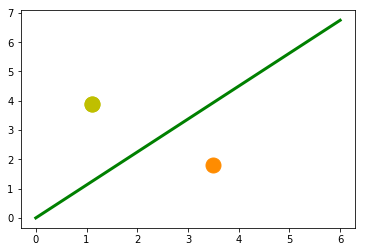

In [2]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or", 
        color="darkorange", 
        markersize=15)
ax.plot(1.1, 3.9, "oy", 
        markersize=15)

point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]  
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()




It is clear that a point $A = (a_1, a_2)$ is not on the line, if $m \cdot a_1 - a_2$ is not equal to 0. We want to know more. We want to know, if a point is above or below a straight line.

![Divion boundary](../images/above_or_below_line.webp "point below or above a straight line")

If a point $B=(b_1, b_2)$ is below this line, there must be a $\delta_B > 0$ so that the point $(b_1, b_2 + \delta_B)$ will be on the line.

This means that

$$m\cdot b_1  - (b_2 +  \delta_B) = 0$$

which can be rearranged to

$$m\cdot b_1 - b_2 = {\delta_B}$$

Finally, we have a criteria for a point to be below the line. $m \cdot b_1 - b_2$ is positve, because ${\delta_B}$ is positive.


The reasoning for "a point is above the line" is analogue: If a point $A=(a_1, a_2)$ is above the line, there must be a $\delta_A > 0$ so that the point $(a_1, a_2 - \delta_A)$ will be on the line. 

This means that

$$m \cdot a_1 - (a_2 - \delta_A) = 0$$

which can be rearranged to

$$m \cdot a_1 - a_2 = -\delta_A$$

In summary, we can say: A point $P(p_1, p_2)$ lies

- below the straight line if $m \cdot p_1 - p_2 > 0$
- on the straight line if $m \cdot p_1 - p_2 = 0$
- above the straight line if $m \cdot p_1 - p_2 < 0$


We can now verify this on our fruits. The lemon has the coordinates (1.1, 3.9) and the orange the coordinates 3.5, 1.8. The point on the line, which we used to define our separation straight line has the values (4, 4.5). So m is 4.5 divides by 4.

In [3]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


We did not calculate the green line using mathematical formulas or methods, but arbitrarily determined it by visual judgement. We could have chosen other lines as well. 

The following Python program calculates and renders a bunch of lines. All going through the origin, i.e. the point (0, 0). The red ones are completely unusable for the purpose of separating the two fruits, because in these cases both the lemon and the orange are on the same side of the straight line. However, it is obvious that even the green ones might not be too useful if we have more than these two fruits. Some lemons might be sweeter and some oranges can be quite sour. 



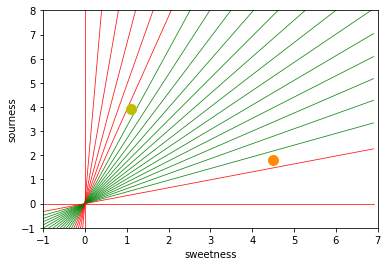

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ 
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line, 
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance
    
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
 
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)


plt.show()

Basically, we have carried out a classification based on our dividing line. Even if hardly anyone would describe this as such. 

It is easy to imagine that we have more lemons and oranges with slightly different sourness and sweetness values. This means we have a class of lemons (```class1```) and a class of oranges ```class2```. This is depicted in the following diagram. 


![Two clusters of 2-dimensional points](../images/line_separation0.webp "Two clusters of 2-dimensional points")

We are going to "grow" oranges and lemons with a Python program. We will create these two classes by randomly creating points within a circle with a defined center point and radius. The following Python code will create the classes:

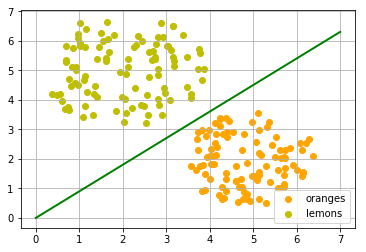

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()



The dividing line was again arbitrarily set by eye. The question arises how to do this systematically? We are still only looking at straight lines going through the origin, which are uniquely defined by its slope. the following Python program calculates a dividing line by going through all the fruits and dynamically adjusts the slope of the dividing line we want to calculate. If a point is above the line but should be below the line, the slope will be increment by the value of ```learning_rate```. If the point is below the line but should be above the line, the slope will be decremented  by the value of ```learning_rate```.

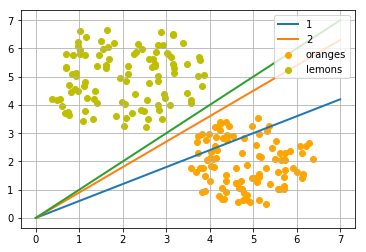

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle


X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

fruits = list(zip(oranges_x, 
                  oranges_y, 
                  repeat(0, len(oranges_x)))) 
fruits += list(zip(lemons_x, 
                   lemons_y, 
                   repeat(1, len(oranges_x))))
shuffle(fruits)

def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
        #print(label, res)
        if label == 0 and res < 0:
            # point is above line but should be below 
            # => increment slope
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X, 
                    linewidth=2, label=str(counter))

        elif label == 1 and res > 0:
            # point is below line but should be above 
            # => decrement slope
            #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,  
                    linewidth=2, label=str(counter))
    return slope

         
slope = adjust()
ax.plot(X, 
        slope * X,  
        linewidth=2)
ax.legend()
ax.grid()
plt.show()

print(slope)

Let's start with a different slope from the 'lemon side':

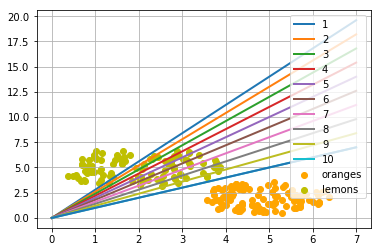

0.9999999999999996


In [44]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X, 
        slope * X,  
        linewidth=2)
ax.legend()
ax.grid()
plt.show()

print(slope)

### A simple Neural Network

We were capable of separating the two classes with a straight line. One might wonder what this has to do with neural networks. We will work out this connection below.

We are going to define a neural network to classify the previous data sets. Our neural network will only consist of one neuron. A neuron with two input values, one for 'sourness' and one for 'sweetness'. 


<img width="60%" src="../images/one_perceptron_neural_network.webp" srcset="../images/one_perceptron_neural_network_800w.webp 800w,../images/one_perceptron_neural_network_700w.webp 700w,../images/one_perceptron_neural_network_600w.webp 600w,../images/one_perceptron_neural_network_500w.webp 500w,../images/one_perceptron_neural_network_400w.webp 400w,../images/one_perceptron_neural_network_350w.webp 350w,../images/one_perceptron_neural_network_300w.webp 300w" alt="A Neural Network with just one perceptron" />

The two input values - called ```in_data``` in our Python program below - have to be weighted by weight values. 
So solve our problem, we define a Perceptron class. An instance of the class is a Perceptron (or Neuron). It can be initialized with the input_length, i.e. the number of input values, and the weights, which can be given as a list, tuple or an array. If there are no values for the weights given or the parameter is set to None, we will initialize the weights to 1 / input_length.

In the following example choose -0.45 and 0.5 as the values for the weights. This is not the normal way to do it. A Neural Network calculates the weights automatically during its training phase, as we will learn later. 

In [7]:
import numpy as np

class Perceptron:
    
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum
    
p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

-1.8131460150609238, -1.1931285955719209, -1.3127632381850327, -1.3925163810790897, -0.7522874009031233, -0.8402958901009828, -1.9330506389030604, -1.490534974734101, -0.4441170096959772, -1.9942817372340516, 1.998076257605724, 1.1512784858148413, 2.51418870799987, 0.4867012212497872, 1.7962680593822624, 0.8751627422712609, 1.5455925862569528, 1.6976576197574347, 1.4467637066140102, 1.4634541513290587, 

We can see that we get a negative value, if we input an orange and a posive value, if we input a lemon. With this knowledge, we can calculate the accuracy of our neural network on this data set:

In [8]:
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1


for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1

print(evaluation)

Counter({'corrects': 200})


How does the calculation work? We multiply the input values with the weights and get negative and positive values. Let us examine what we get, if the calculation results in 0:

$$w_1 \cdot x_1 + w_2 \cdot x_2 = 0$$

We can change this equation into 

$$ x_2 = -\frac{w_1}{w_2} \cdot x_1$$

We can compare this with the general form of a straight line 

$$ y = m \cdot x + c$$

where:

-  m is the slope or gradient of the line.
-  c is the y-intercept of the line.
-  x is the independent variable of the function.

We can easily see that our equation corresponds to the definition of a line and the slope (aka gradient) $m$ is $-\frac{w_1}{w_2}$ and $c$ is equal to 0.

This is a straight line separating the oranges and lemons, which is called the **decision boundary**. 

We visualize this with the following Python program:



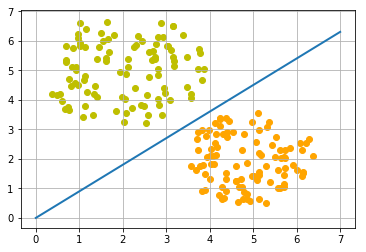

0.9


In [9]:
import time
import matplotlib.pyplot as plt
slope = 0.1

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

slope = 0.45 / 0.5
ax.plot(X, slope * X,  linewidth=2)


ax.grid()
plt.show()

print(slope)

### Training a Neural Network

As we mentioned in the previous section: We didn't train our network. We have adjusted the weights to values that we know would form a dividing line. We want to demonstrate now, what is necessary to train our simple neural network. 

Before we start with this task, we will separate our data into training and test data in the following Python program. By setting the random_state to the value 42 we will have the same output for every run, which can be benifial for debugging purposes.

In [10]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])



[(2.592320569178846, 5.623712204925406), (4.7943502284049355, 0.8839613414681706), (2.1239534889189637, 5.377962359316873), (4.130183870483639, 3.2036358839244397), (2.5700607722439957, 3.4894903329620393), (1.1874742907020708, 4.248237496795156), (4.975409937616054, 3.258818001021547), (2.4858113049930375, 3.778544332039814), (0.759896779289841, 4.699741038079466), (1.3275488108562907, 4.204176294559159)] [1, 0, 1, 0, 1, 1, 0, 1, 1, 1]


As we start with two arbitrary weights, we cannot expect the result to be correct. For some points (fruits) it may return the proper value, i.e. 1 for a lemon and 0 for an orange. In case we get the wrong result, we have to correct our weight values. First we have to calculate the error. The error is the difference between the target or expected value (```target_result```) and the calculated value (```calculated_result```).
With this error we have to adjust the weight values with an incremental value, i.e. $w_1 = w_1 + \Delta w_1$ and $w_2 = w_2 + \Delta w_2$

<img width="80%" src="../images/neuron_input_weights_error_correction.webp" srcset="../images/neuron_input_weights_error_correction_800w.webp 800w,../images/neuron_input_weights_error_correction_700w.webp 700w,../images/neuron_input_weights_error_correction_600w.webp 600w,../images/neuron_input_weights_error_correction_500w.webp 500w,../images/neuron_input_weights_error_correction_400w.webp 400w,../images/neuron_input_weights_error_correction_350w.webp 350w,../images/neuron_input_weights_error_correction_300w.webp 300w" alt="Adjusting the weights in a neural network" />

If the error ```e``` is 0, i.e. the target result is equal to the calculated result, we don't have to do anything. The network is perfect for these input values. If the error is not equal, we have to change the weights. We have to change the weights by adding small values to them. These values may be positive or negative. The amount we have a change a weight value depends on the error and on the input value. Let us assume, $x_1 = 0$ and $x_2 > 0$. In this case the result in this case solely results on the input $x_2$. This on the other hand means that we can minimize the error by changing solely $w_2$. If the error is negative, we will have to add a negative value to it, and if the error is positive, we will have to add a positive value to it. From this we can understand that whatever the input values are, we can multiply them with the error and we get values, we can add to the weights. One thing is still missing: Doing this we would learn to fast. We have many samples and each sample should only change the weights a little bit. Therefore we  have to multiply this result with a learning rate (```self.learning_rate```). The learning rate is used to control how fast the weights are updated. Small values for the learning rate result in a long training process, larger values bear the risk of ending up in sub-optimal weight values. We will have a closer look at this in our chapter on backpropagation.



We are ready now to write the code for adapting the weights, which means training the network. For this purpose, we add a method 'adjust' to our Perceptron class. The task of this method is to crrect the error.



In [10]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.68135341  2.07512397]


Both on the learning and on the test data, we have only correct values, i.e. our network was capable of learning automatically and successfully!

We visualize the decision boundary with the following program:

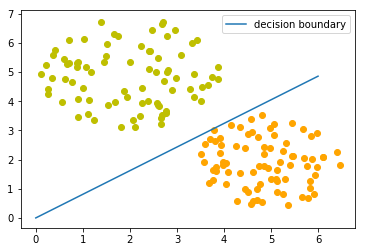

[-1.68135341  2.07512397]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

Let us have a look on the algorithm "in motion". 


1 -3.0400347553192493 [-1.45643048 -0.4790835 ] (5.188101611742407, 1.930278325463612)
2 0.5905980182798966 [-0.73406347  1.24291557] (2.4078900359381787, 5.739996893315745)
18 6.70051650445074 [-2.03694068  0.30399756] (4.342924008657758, 3.129726697580847)
20 0.5044094409795936 [-0.87357998  1.73188666] (3.877868972161467, 4.759630340827767)
27 2.7418853617419434 [-2.39560903  0.87370868] (5.073430165416017, 2.8605932860372967)
31 0.8102423930878537 [-1.68135341  2.07512397] (2.38085207252672, 4.004717642222739)


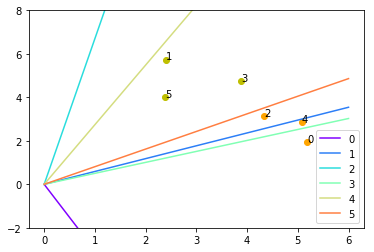

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"        
        ax.scatter(train_data[index][0], 
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter), 
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()


Each of the points in the diagram above cause a change in the weights. We see them numbered in the order of their appearance and the corresponding straight line. This way we can see how the networks "learns".